<a href="https://colab.research.google.com/github/diana-mendes/drama/blob/master/synopses_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scratchbook: Semantic Text Similarity on Synopses 
# (using TF HUB's model for sentence encoding)


Based on:
https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/semantic_similarity_with_tf_hub_universal_encoder.ipynb

In [ ]:
from absl import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow_hub as hub
import seaborn as sns

## 1. Load Universal Encoder Model

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" #@param ["https://tfhub.dev/google/universal-sentence-encoder/4", "https://tfhub.dev/google/universal-sentence-encoder-large/5"]
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


## Load and clean synopsis data

In [ ]:
file_path = "/content/drive/My Drive/Colab Notebooks/drama-notebooks/dramawiki_2019_dramas_other_details.csv"
data = pd.read_csv(file_path, sep='\t')
data.shape

(150, 4)

In [ ]:
def clean_synopsis(synopsis_raw):
  if not isinstance(synopsis_raw, str):
    return None
  synopsis = synopsis_raw.strip()
  return synopsis.split(" --")[0]

data['synopsis_clean'] = data['synopsis'].apply(lambda x: clean_synopsis(x))

In [ ]:
synopses = data['synopsis_clean'].dropna().values.tolist()

# Compute embeddings and display similarity

In [ ]:
def plot_similarity(labels, features, rotation):
  with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    corr = np.inner(features, features)
    sns.set(font_scale=0.5)
    ax = sns.heatmap(
        corr,
        xticklabels=labels,
        yticklabels=labels,
        vmin=0,
        vmax=1,
        cmap="YlOrRd")
    ax.set_xticklabels(labels, rotation=rotation)
    ax.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  labels = [str(i) for i in range(len(messages_))]
  plot_similarity(labels, message_embeddings_, 90)

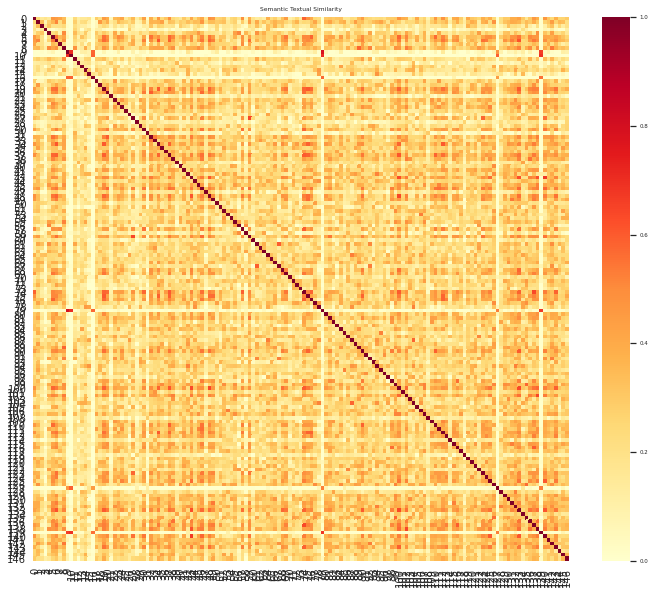

In [ ]:
run_and_plot(synopses)

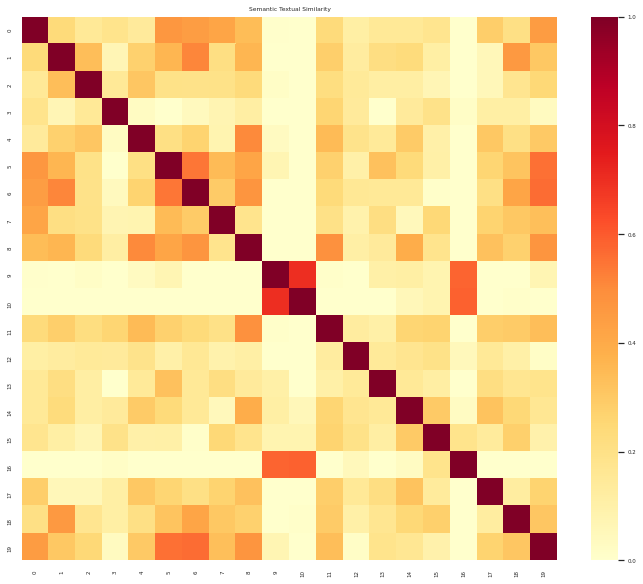

In [ ]:
run_and_plot(synopses[:20])

In [ ]:
synopses[11]

'When a boy is seriously injured in an incident of school violence, his parents try to uncover the truth of what happened to him and seek justice against the powerful people responsible.'

In [ ]:
synopses[8]

"A prosecutor who started his career as a reporter for a newspaper faces a life-changing event when his father dies in an unexplained accident, and his mother takes her own life. With his life shattered in pieces, he won't stop at anything to uncover what happened and to get revenge."

In [ ]:
synopses[15]

'A school drama from the perspective of the teachers.'

In [ ]:
synopses[10]

'See Be Melodramatic/Episode Ratings'

In [ ]:
# TODO: clean the missing synopses like: https://wiki.d-addicts.com/Bad_Love_(2019)
# index 9 and 10 above!

In [ ]:
message_embeddings_

NameError: ignored